In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D:\Anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 一、创建张量

## 1、直接创建张量

In [6]:
flag = True
if flag:
    arr = np.ones([3,3])
    print('arr数据类型：', arr.dtype)
    
    t = torch.Tensor(arr, device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))
    print(t)

arr数据类型： float64
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


## 2、from_numpy创建张量

In [8]:
flag = True
if flag:
    arr = np.array([[1,2,3],[2,3,4]])
    t = torch.from_numpy(arr)
    print(t)
    
    arr[0][0] = 0
    print(t)       ## 数据也随之变化

tensor([[1, 2, 3],
        [2, 3, 4]], dtype=torch.int32)
tensor([[0, 2, 3],
        [2, 3, 4]], dtype=torch.int32)


## 3、依据数值创建

In [10]:
flag = True
if flag:
    out_t = torch.Tensor([1])
    
    t = torch.zeros([3,3], out=out_t)
    
    print(t, '\n', out_t)
    print(id(t), id(out_t), id(t) == id(out_t))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
2305522661552 2305522661552 True


In [11]:
flag = True
if flag:
    t = torch.full((3,3), 10)
    print(t)

tensor([[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]])


In [12]:
flag = True
if flag:
    t = torch.arange(2,10,2)
    print(t)

tensor([2, 4, 6, 8])


In [13]:
flag = True
if flag:
    t = torch.linspace(2,10,steps=5)
    print(t)

tensor([ 2.,  4.,  6.,  8., 10.])


In [14]:
flag = True
if flag:
    t = torch.eye(4,4)
    print(t)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


In [17]:
t = torch.normal(mean=0, std=1,size=(3,3))
print(t)

tensor([[ 0.2986, -0.8401, -0.8340],
        [-1.2091, -0.4624, -2.2677],
        [ 1.1335,  1.7009, -1.2092]])


In [19]:
mean = torch.arange(1, 5, dtype=torch.float)
std = torch.arange(1, 5, dtype=torch.float)
t_normal = torch.normal(mean, std)
t_normal

tensor([ 1.3724,  3.6892,  0.4200, -5.6512])

In [28]:
t = torch.bernoulli(input=torch.linspace(0,1,10))
t

tensor([0., 0., 0., 0., 0., 1., 0., 0., 1., 1.])

# 二、张量的操作

In [35]:
t = torch.ones((2,3))

t_0 = torch.cat([t,t], dim=0)    ## 按行拼接
t_1 = torch.cat([t,t], dim=1)    ## 按列拼接

In [33]:
torch.chunk(t_1, chunks=3, dim=1)

(tensor([[1., 1.],
         [1., 1.]]),
 tensor([[1., 1.],
         [1., 1.]]),
 tensor([[1., 1.],
         [1., 1.]]))

In [40]:
torch.split(t_1, split_size_or_sections=[2,3,1], dim=1)

(tensor([[1., 1.],
         [1., 1.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[1.],
         [1.]]))

In [42]:
t = torch.randint(0,9,size=(3,3))
idx = torch.tensor([0,2], dtype = torch.long)
t_select = torch.index_select(t, dim=0, index=idx)
print(t)
print(t_select)

tensor([[3, 0, 0],
        [2, 0, 3],
        [5, 6, 8]])
tensor([[3, 0, 0],
        [5, 6, 8]])


In [43]:
t = torch.randint(0,9,size=(3,3))
mask = t.ge(5)    ## 判断元素是否大于等于5
t_select = torch.masked_select(t, mask=mask)
print(t)
print(t_select)

tensor([[0, 7, 5],
        [0, 2, 8],
        [8, 8, 0]])
tensor([7, 5, 8, 8, 8])


In [44]:
torch.reshape(t, (1,9))

tensor([[0, 7, 5, 0, 2, 8, 8, 8, 0]])

In [46]:
t = torch.randint(0,9,size=(3,3,1))
t_s = torch.squeeze(t)
print(t.shape)
print(t_s.shape)

torch.Size([3, 3, 1])
torch.Size([3, 3])


In [47]:
t1 = torch.randint(0,9,size=(3,3))
t2 = torch.ones_like(t1)
t_add = torch.add(t1, t2)
t_add

tensor([[6, 6, 9],
        [8, 4, 4],
        [5, 1, 7]])

# 三、线性回归

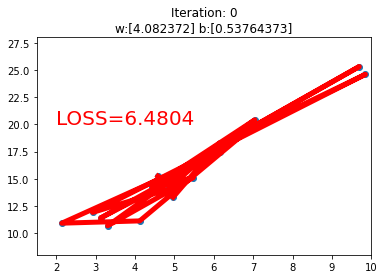

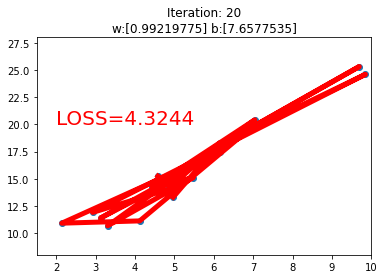

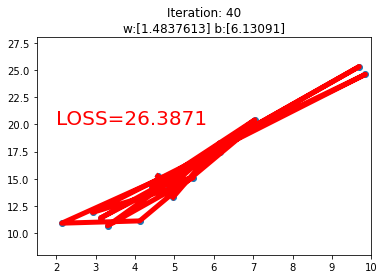

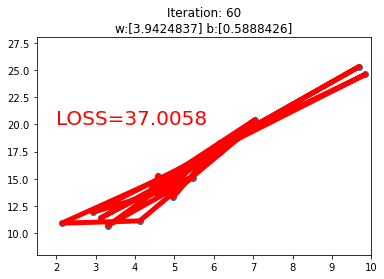

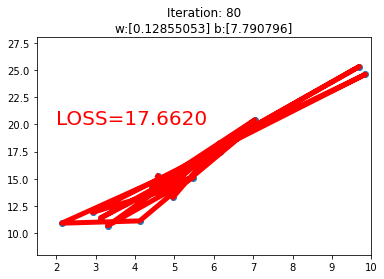

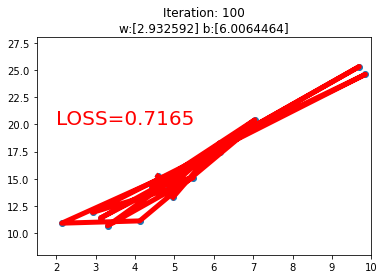

In [50]:
torch.manual_seed(10)
lr = 0.1   ## 学习率

## 创建训练数据集
x = torch.rand(20,1) * 10
y = 2 * x + (5 + torch.randn_like(x))

## 构建线性回归参数
w = torch.randn([1], requires_grad=True)
b = torch.randn([1], requires_grad=True)

## 开始迭代
for iteration in range(1000):
    
    ## 前向传播
    wx = torch.mul(w, x)    ## 点积
    y_pred = torch.add(wx, b)
    
    ## 计算MSE
    loss = (0.5 * (y - y_pred) ** 2).mean()
    
    ## 反向传播
    loss.backward()
    
    ## 更新参数
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)
    
    ## 绘图
    if iteration % 20 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y.data.numpy(), 'r-', lw = 5)
        plt.text(2, 20, 'LOSS=%.4f' % loss.data.numpy(), fontdict={'size':20, 'color':'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title('Iteration: {}\nw:{} b:{}'.format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)
        
        if loss.data.numpy() < 1:
            break

# 四、计算图与动态图机制

In [54]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)

y.backward()
print(w.grad)

tensor([5.])


In [56]:
print(w.is_leaf, x.is_leaf, a.is_leaf, b.is_leaf, y.is_leaf)
print(w.grad, x.grad, a.grad, b.grad, y.grad)

True True False False False
tensor([5.]) tensor([2.]) None None None


D:\Anaconda3\envs\pytorch\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [58]:
print(w.grad_fn, x.grad_fn, a.grad_fn, b.grad_fn, y.grad_fn)

None None <AddBackward0 object at 0x00000218CFA65340> <AddBackward0 object at 0x00000218CFA651C0> <MulBackward0 object at 0x00000218CFA9C760>


# 五、autograd与逻辑回归

In [5]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)

y.backward(retain_graph=True)
y.backward()
print(w.grad)

tensor([10.])


In [22]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)

y0 = torch.mul(a, b)
y1 = torch.add(a, b)

loss = torch.cat([y0, y1], dim=0)
grad_tensors = torch.tensor([1., 2.])

loss.backward(gradient=grad_tensors)       ## 多梯度权重

print(w.grad)

tensor([9.])


In [23]:
x = torch.tensor([3.], requires_grad=True)
y = torch.pow(x, 2)      ## y = x ** 2

grad_1 = torch.autograd.grad(y, x, create_graph=True)   
## create_graph=True，使可以对grad_1再次求导
print(grad_1)

grad_2 = torch.autograd.grad(grad_1[0], x)     ## 二阶求导
print(grad_2)

(tensor([6.], grad_fn=<MulBackward0>),)
(tensor([2.]),)


# 六、逻辑回归

In [28]:
# ============================ step 1/5 生成数据 ============================
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums, 2)
x0 = torch.normal(mean_value * n_data, std = 1) + bias      # 类别0 数据 shape=(100, 2)
y0 = torch.zeros(sample_nums)                         # 类别0 标签 shape=(100, 1)
x1 = torch.normal(-mean_value * n_data, std = 1) + bias     # 类别1 数据 shape=(100, 2)
y1 = torch.ones(sample_nums)                          # 类别1 标签 shape=(100, 1)
train_x = torch.cat((x0, x1), 0)
train_y = torch.cat((y0, y1), 0)

In [27]:
# ============================ step 2/5 选择模型 ============================
class LR(torch.nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.features = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.features(x)
        x = self.sigmoid(x)
        return x


lr_net = LR()   # 实例化逻辑回归模型

In [29]:
# ============================ step 3/5 选择损失函数 ============================
loss_fn = torch.nn.BCELoss()    ## 交叉熵损失函数

In [30]:
# ============================ step 4/5 选择优化器   ============================
lr = 0.01  # 学习率
optimizer = torch.optim.SGD(lr_net.parameters(), lr=lr, momentum=0.9)

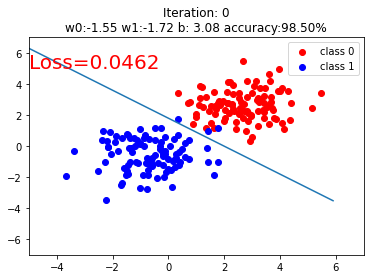

In [32]:
# ============================ step 5/5 模型训练 ============================
for iteration in range(1000):

    # 前向传播
    y_pred = lr_net(train_x)

    # 计算 loss
    loss = loss_fn(y_pred.squeeze(), train_y)

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    # 清空梯度
    optimizer.zero_grad()

    # 绘图
    if iteration % 20 == 0:

        mask = y_pred.ge(0.5).float().squeeze()  # 以0.5为阈值进行分类
        correct = (mask == train_y).sum()  # 计算正确预测的样本个数
        acc = correct.item() / train_y.size(0)  # 计算分类准确率

        plt.scatter(x0.data.numpy()[:, 0], x0.data.numpy()[:, 1], c='r', label='class 0')
        plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='b', label='class 1')

        w0, w1 = lr_net.features.weight[0]
        w0, w1 = float(w0.item()), float(w1.item())
        plot_b = float(lr_net.features.bias[0].item())
        plot_x = np.arange(-6, 6, 0.1)
        plot_y = (-w0 * plot_x - plot_b) / w1

        plt.xlim(-5, 7)
        plt.ylim(-7, 7)
        plt.plot(plot_x, plot_y)

        plt.text(-5, 5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.title("Iteration: {}\nw0:{:.2f} w1:{:.2f} b: {:.2f} accuracy:{:.2%}".format(iteration, w0, w1, plot_b, acc))
        plt.legend()

        plt.show()
        plt.pause(0.5)

        if acc > 0.98:
            break
